# When is the best time to book in Portugal: An analysis between a resort hotel and a hotel located in the city

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
hotel_df = pd.read_csv('hotel_bookings.csv')

In [5]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_df.shape

(119390, 32)

In [9]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
null_values = pd.DataFrame({'Null Values' : hotel_df.isna().sum(), 'Percentage Null Values' : (hotel_df.isna().sum()) / (hotel_df.shape[0]) * (100)})
null_values

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [11]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
filter = (hotel_df['children'] == 0) & (hotel_df['adults'] == 0) & (hotel_df['babies'] == 0)
hotel_df[~filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [22]:
top_bookings = hotel_df['country'].value_counts().head(10)
top_bookings

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

# Most bookings by country

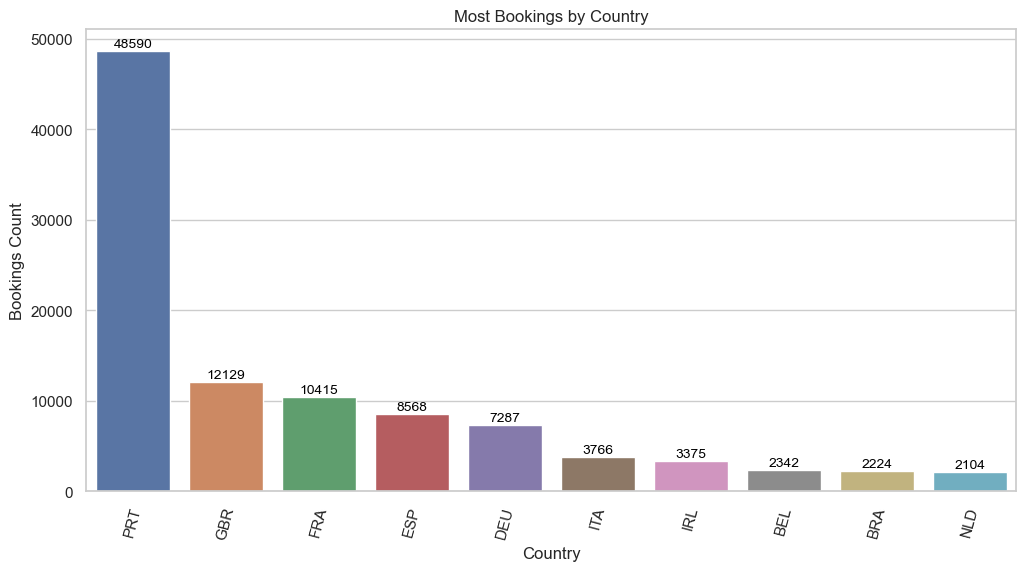

In [97]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Most Bookings by Country')
ax = sns.barplot(x=top_bookings.index, y=top_bookings)
plt.xlabel("Country")
plt.ylabel("Bookings Count")

# Add actual values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Guests by Country


In [28]:
guests_by_country = hotel_df[hotel_df['is_canceled'] == 0]['country'].value_counts().reset_index()
guests_by_country.columns = ['country', 'No of guests']
guests_by_country.head(15)

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


In [29]:
top_countries_guests = guests_by_country.head(10)
top_countries_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


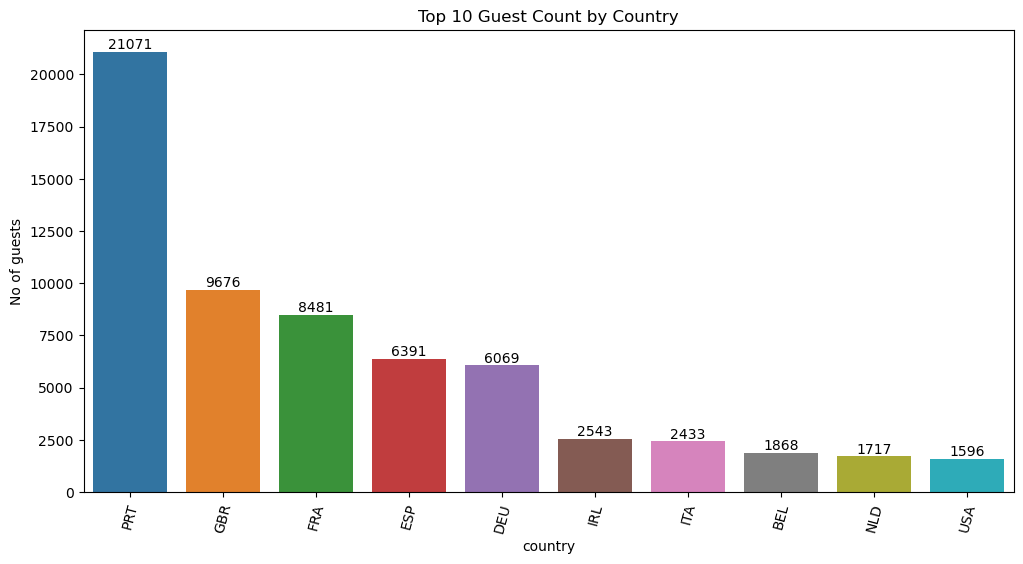

In [38]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 Guest Count by Country')
ax = sns.barplot(x=top_countries_guests.country, y=top_countries_guests['No of guests']);

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# What is the Average Cost Per Night


In [39]:
resort_hotel = hotel_df.loc[(hotel_df["hotel"] == "Resort Hotel") & (hotel_df["is_canceled"] == 0)]
city_hotel = hotel_df.loc[(hotel_df["hotel"] == "City Hotel") & (hotel_df["is_canceled"] == 0)]

In [40]:
resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_85048/308976669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])


In [41]:
resort_hotel_filtered = resort_hotel.replace([np.inf, -np.inf], 0)
city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])
city_hotel_filtered = city_hotel.replace([np.inf, -np.inf], 0)

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_85048/2273968027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])


In [42]:
print("""Bookings not includng cancellations across all room types and meals, the average price per night is:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(resort_hotel_filtered["adr_pp"].mean(), city_hotel_filtered["adr_pp"].mean()))

Bookings not includng cancellations across all room types and meals, the average price per night is:
Resort hotel: 47.49 € per night and person.
City hotel: 59.23 € per night and person.


In [43]:
hotel_df["adr_pp"] = hotel_df["adr"] / (hotel_df["adults"] + hotel_df["children"])
hotel_df_guests = hotel_df.loc[hotel_df["is_canceled"] == 0]
hotel_df_guests

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000


In [71]:
room_prices = hotel_df_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")
room_prices

,hotel,reserved_room_type,adr_pp
80541,City Hotel,A,68.850
90111,City Hotel,A,55.675
90112,City Hotel,A,49.830
90114,City Hotel,A,64.000
90115,City Hotel,A,64.500
...,...,...,...
26937,Resort Hotel,H,80.500
14570,Resort Hotel,L,82.000
15855,Resort Hotel,L,86.000
911,Resort Hotel,L,100.000


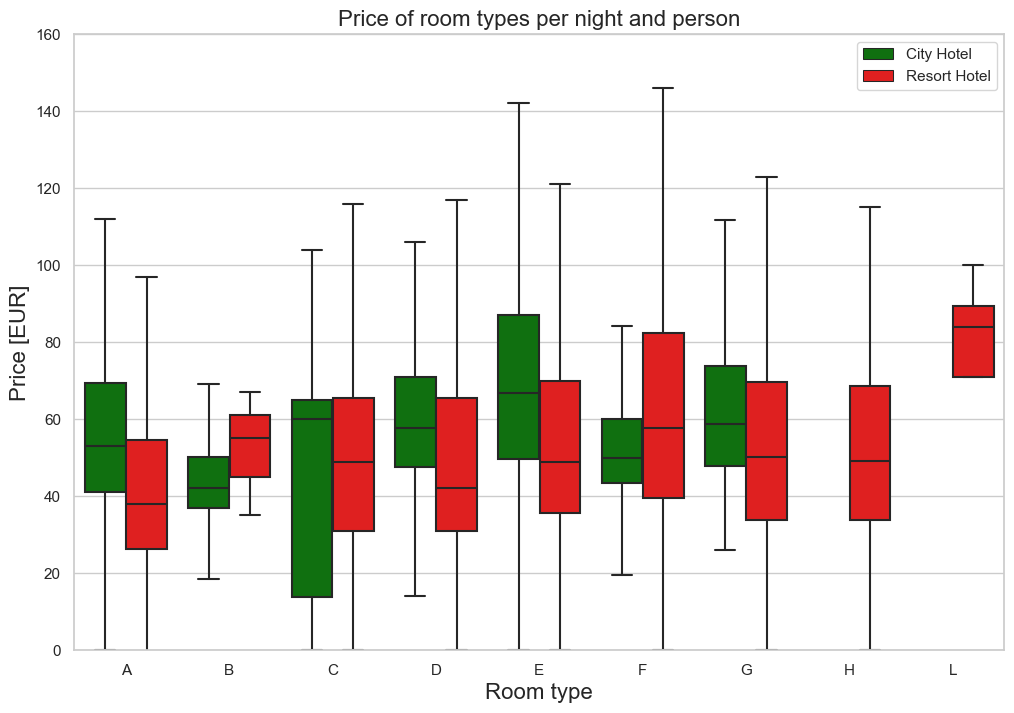

In [74]:
plt.figure(figsize=(12, 8))
colors = {"City Hotel": "green", "Resort Hotel": "red"}
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0, palette=colors)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

Text(0.5, 0, 'Type of Customers')

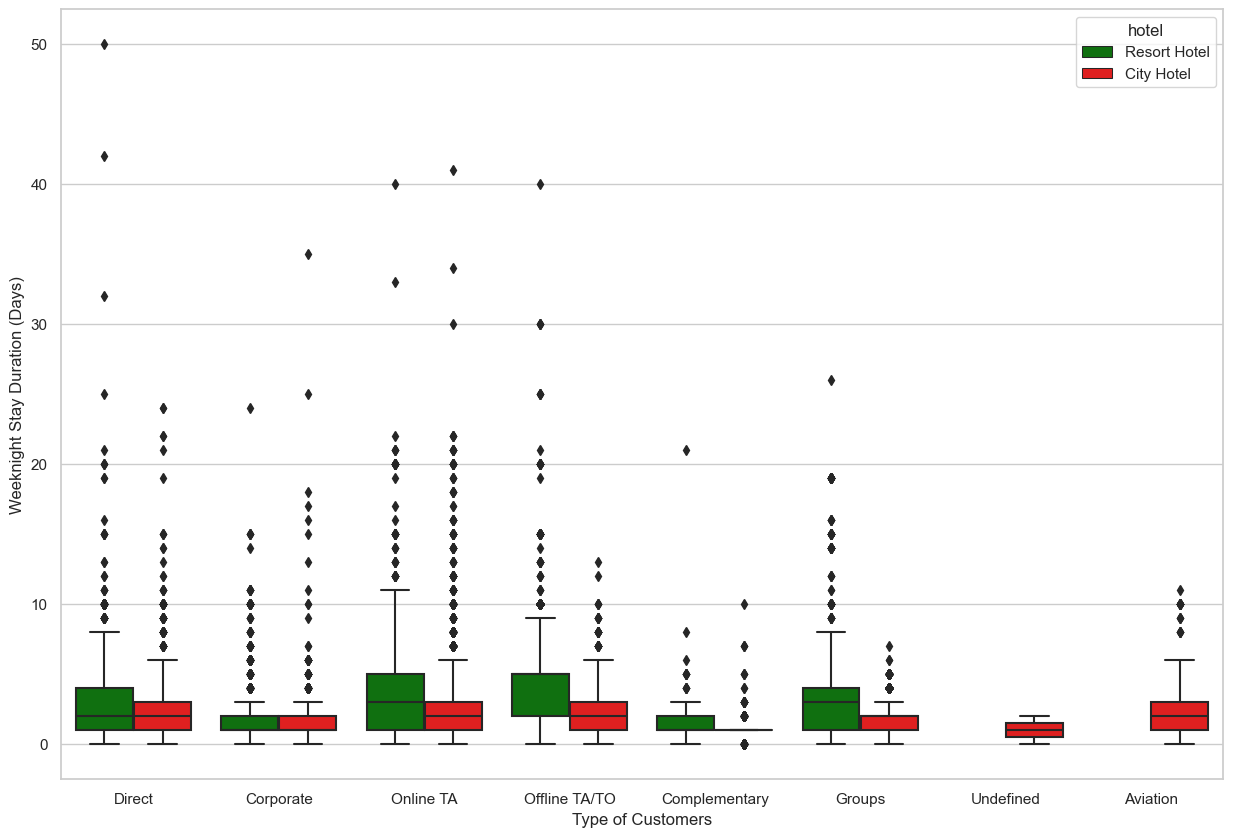

In [98]:
plt.figure(figsize = (15,10))
colors = {"City Hotel": "red", "Resort Hotel": "green"}
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = hotel_df, hue = "hotel", palette = colors)
plt.ylabel("Weeknight Stay Duration (Days)")
plt.xlabel("Type of Customers")

Text(0.5, 0, 'Type of Customers')

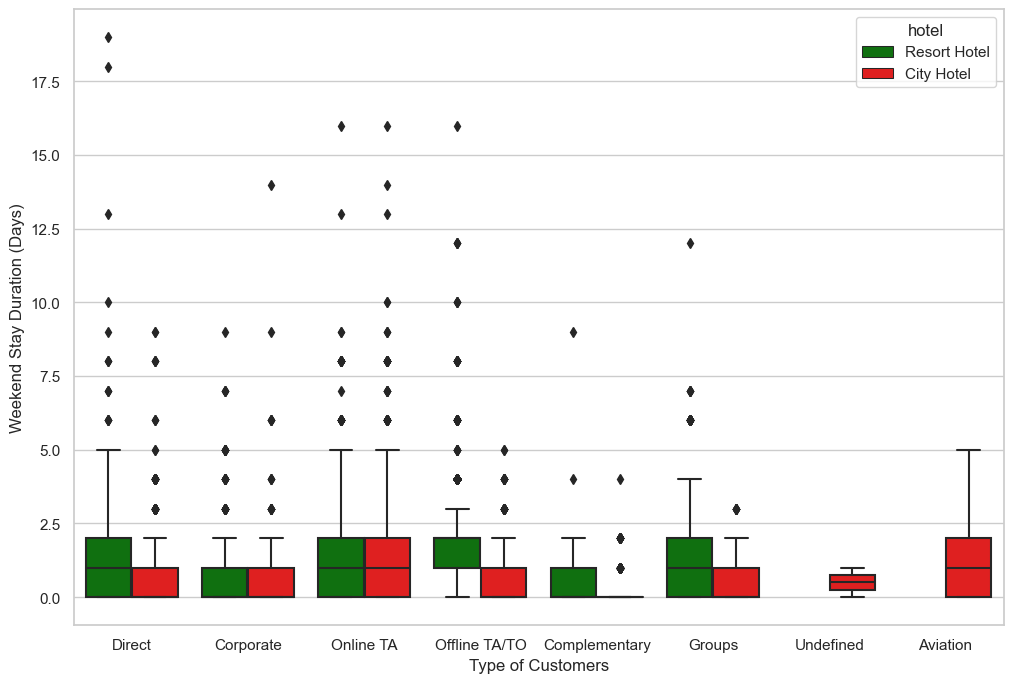

In [99]:
plt.figure(figsize=(12,8))
colors={"City Hotel": "Red", "Resort Hotel": "Green"}
sns.boxplot(x="market_segment", y="stays_in_weekend_nights", data=hotel_df, hue="hotel", palette=colors)
plt.ylabel("Weekend Stay Duration (Days)")
plt.xlabel("Type of Customers")


The graphs reveal that while many groups exhibit a normal distribution, some show significant skewness. A notable trend is that the majority of individuals tend not to extend their hotel stays beyond one week. Conversely, the preference for longer stays is more apparent in resort hotels, where guests might stay for up to 12–13 days. This duration, however, varies across different segments, with stays exceeding 15 days being outliers in each segment. The distinction becomes clearer when examining visualizations combining weekend and weeknight stays.

Notably, customers belonging to the Aviation Segment show a preference for city hotels, displaying a comparatively shorter average stay. Their weekend and weekday averages are roughly equivalent, suggesting brief stays, possibly due to business-related trips. This observation aligns with the likelihood that most airports are situated closer to city hotels rather than resort hotels.

In general, it is evident that guests opting for resort hotels tend to prolong their stays.

# How does the average cost change over the year?

In [44]:
room_prices_monthly = hotel_df_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")
room_prices_monthly

,hotel,arrival_date_month,adr_pp
48869,City Hotel,April,81.90
110757,City Hotel,April,65.25
110758,City Hotel,April,65.25
110759,City Hotel,April,45.00
110760,City Hotel,April,65.25
...,...,...,...
43519,City Hotel,September,31.00
43518,City Hotel,September,28.00
43517,City Hotel,September,38.25
43563,City Hotel,September,45.00


In [45]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]
room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_85048/283720837.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x="arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_monthly,


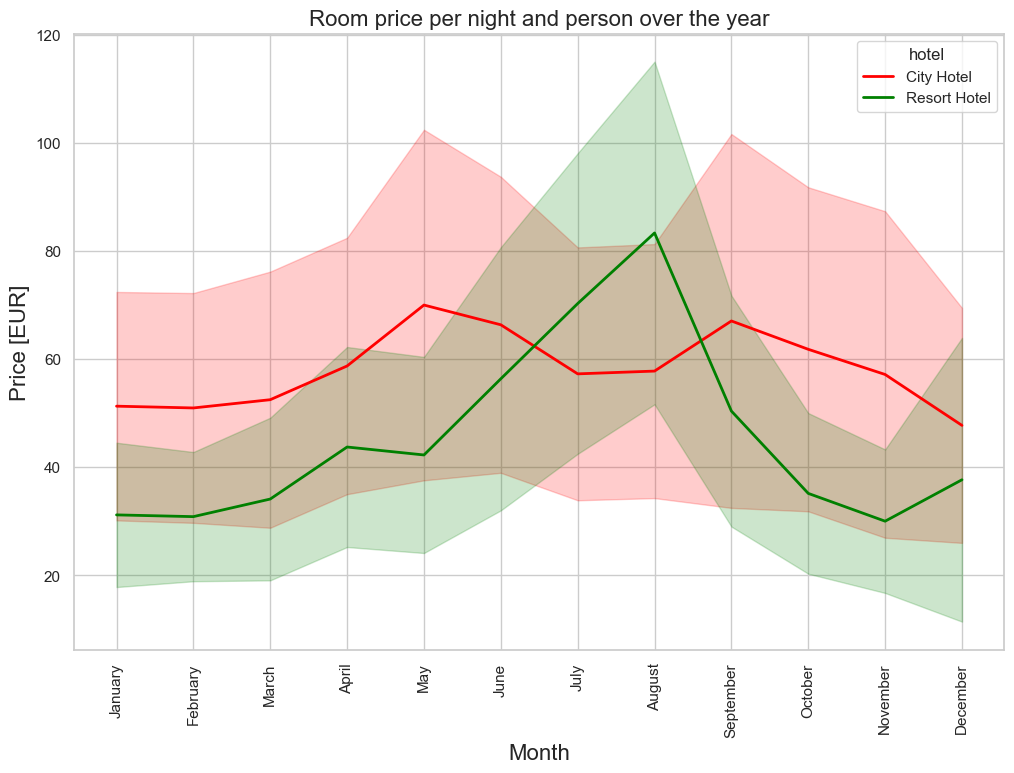

In [82]:
plt.figure(figsize=(12, 8))
colors = {"City Hotel": "red", "Resort Hotel": "green"}
sns.lineplot(x="arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_monthly, 
             hue_order=["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2, 2), palette=colors)

for month, price in zip(room_prices_monthly["arrival_date_month"], room_prices_monthly["adr_pp"]):
    plt.annotate(f'{price:.2f}', (room_prices_monthly[room_prices_monthly["arrival_date_month"] == month].index[0], price),
                 ha='center', va='bottom', fontsize=8, color='black')

plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

Prices are much higher in August if you are trying to book a resort hotel. With the beaches nearby, people would be delighted to stay at a nice resort and also enjoy swimming at the beach because of Portugal's summer season. The prices of city hotels varies where May and September seem to be the most expensive. Walking aroundthe city of Lisbon can get hot, so going right before and right after the summer season may be the reason to the price spike in the city hotel in Lisbon. 

# Customer Arrivals by Month

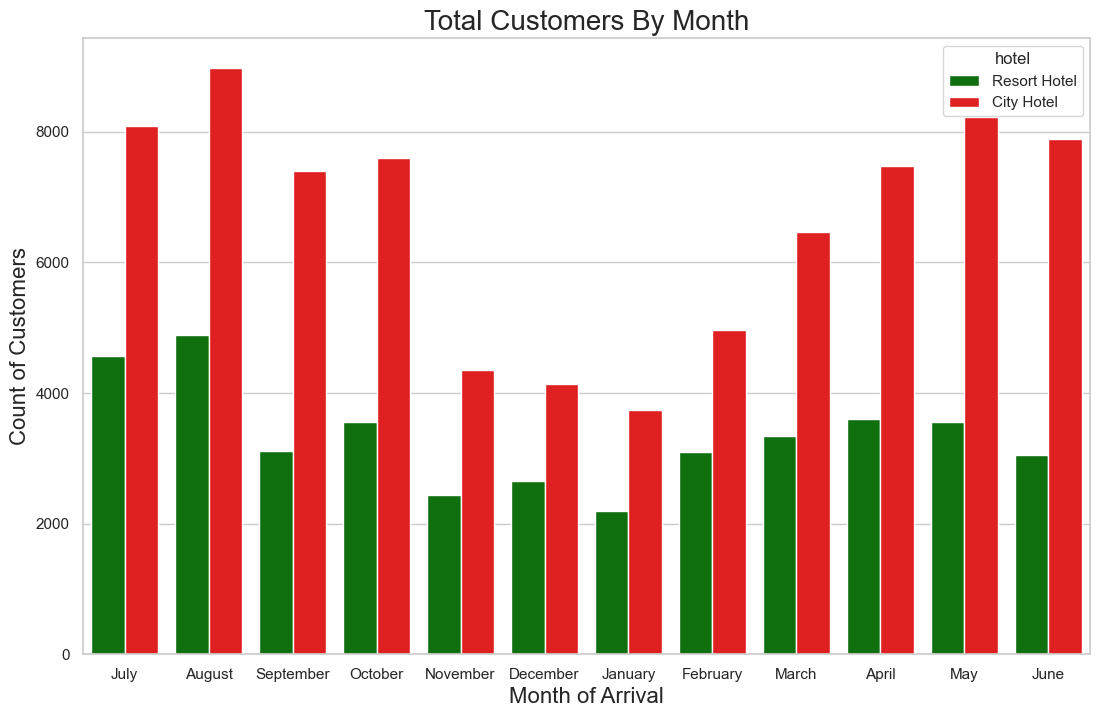

In [81]:
plt.figure(figsize=(13, 8))
sns.set(style="whitegrid")
plt.title("Total Customers By Month", fontdict={'fontsize': 20})
colors = {"City Hotel": "red", "Resort Hotel": "green"}

ax = sns.countplot(x="arrival_date_month", hue='hotel', data=hotel_df, palette=colors)
plt.xlabel("Month of Arrival", fontsize=16)
plt.ylabel("Count of Customers", fontsize=16)

plt.show()

From the graph above, we can see that there are more customers arriving at the city hotel in Lisbon than the resort hotel. In terms of proportions resort hotels come closer to city hotels during the summer. 

# Busiest Month - Average Guests Per Month

In [55]:
# Creating a DateFrame with the relevant data:
resort_guests_monthly = resort_hotel.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city_hotel.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

In [56]:
# Data ordered by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

In [57]:
# Dataset contains July and August date from 3 years, the other month from 2 years.
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

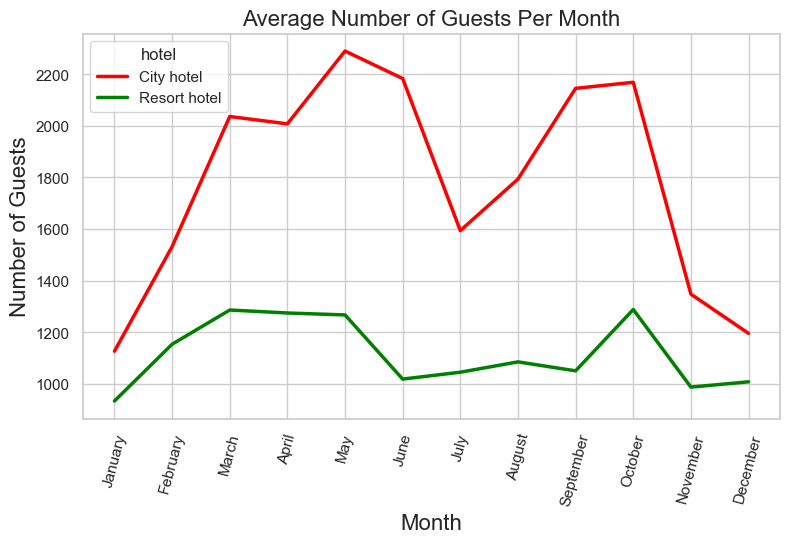

In [80]:
plt.figure(figsize=(9,5))
colors = {"City hotel": "red", "Resort hotel": "green"}
sns.lineplot(x="month", y="guests", hue="hotel", data=full_guest_data,
             hue_order=["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5), palette=colors)

plt.title("Average Number of Guests Per Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=75)
plt.ylabel("Number of Guests", fontsize=16)
plt.show()

Looking at this graph, we can see that there is a large spike during May and September-October. These are the times where the hotel prices are not at its peak which is why guests may reserve at these months especially for the city hotels. From June through September, when the costs are at the greatest, fewer guests stay at the resort hotels. We can also see that the average number of hotel guests per month is at the lowest during the winter, especially in January and December. 